In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
df = pd.read_csv('./Hot_wings_v3.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585427 entries, 0 to 1585426
Data columns (total 43 columns):
Unnamed: 0            1585427 non-null int64
Age_Band_of_Driver    1585427 non-null int64
Date                  1585427 non-null int64
Accident_Severity     1585427 non-null int64
Female                1585427 non-null int64
Male                  1585427 non-null int64
AUDI                  1585427 non-null int64
BMW                   1585427 non-null int64
CITROEN               1585427 non-null int64
DAF TRUCKS            1585427 non-null int64
DENNIS                1585427 non-null int64
FIAT                  1585427 non-null int64
FORD                  1585427 non-null int64
HONDA                 1585427 non-null int64
HYUNDAI               1585427 non-null int64
KAWASAKI              1585427 non-null int64
KIA                   1585427 non-null int64
LAND ROVER            1585427 non-null int64
LONDON TAXIS INT      1585427 non-null int64
MAN                   1585427 no

In [20]:
df.corrwith(df.Male).sort_values(ascending = False)

Male                  1.000000
VOLVO                 0.067706
YAMAHA                0.066340
Accident_Severity     0.064503
SCANIA                0.059661
DAF TRUCKS            0.056060
KAWASAKI              0.053348
MERCEDES              0.053060
DENNIS                0.051341
HONDA                 0.048046
LONDON TAXIS INT      0.046043
MAN                   0.045631
Dual carriageway      0.026728
PIAGGIO               0.024460
SUZUKI                0.024283
BMW                   0.023571
SKODA                 0.013788
One way street        0.010875
MITSUBISHI            0.009749
Age_Band_of_Driver    0.003238
LAND ROVER            0.002466
AUDI                 -0.000287
Slip road            -0.002882
FORD                 -0.005579
ROVER                -0.006074
SEAT                 -0.012550
VOLKSWAGEN           -0.014475
Single carriageway   -0.014625
MAZDA                -0.018198
VAUXHALL             -0.018375
Roundabout           -0.019098
CITROEN              -0.022787
TOYOTA  

In [5]:
#split dataset in features and target variable
#df.drop(['Male'], axis=1)
feature_cols = df.columns

#feature_cols.drop("Male")
X = df[feature_cols] # Features
Y = df.Male # Target variable


In [6]:
X = X.drop(['Male'], 1)
X = X.drop(['Female'], 1)
#X = X.drop(['Date'], 1)
X = X.drop(['Unnamed: 0'], 1)

X

,Age_Band_of_Driver,Date,Accident_Severity,AUDI,BMW,CITROEN,DAF TRUCKS,DENNIS,FIAT,FORD,...,TOYOTA,VAUXHALL,VOLKSWAGEN,VOLVO,YAMAHA,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
0,0,20050105,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,20050106,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,20050107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,20050110,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,20050111,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,20050111,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,20050113,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,20050113,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1,20050116,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,3,20050125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
#X = df[feature_cols]
#X = X.drop(["Male", "Female"])
#X = X.drop("Female", axis=1)
#X = X.drop("ABARTH", axis=1)
#X = X.drop("Unnamed: 0", axis=1)
#X = X.drop("AC (ELECTRIC)", axis=1)
#X = X.drop("ACCESS", axis=1)
#X = X.drop("Unnamed: 0", axis=1)



X.head()

,Age_Band_of_Driver,Date,Accident_Severity,AUDI,BMW,CITROEN,DAF TRUCKS,DENNIS,FIAT,FORD,...,TOYOTA,VAUXHALL,VOLKSWAGEN,VOLVO,YAMAHA,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
0,0,20050105,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,20050106,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,20050107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,20050110,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,20050111,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
from  sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 70% training and 30% test IS CHANGED TO 80/20!!!
# Create Decision Tree classifer object

In [9]:
classifier_names = [
    "Decision Tree",
    "Random Forest",   
    "Naive Bayes"
]
# "Neural Net (100, 100)",

In [10]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    
    GaussianNB(),
]

# MLPClassifier(hidden_layer_sizes=(100, 100)),

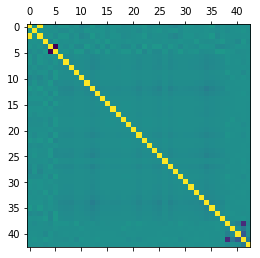

In [20]:
plt.matshow(df.corr())
plt.show()

In [24]:
import numpy as np

rs = np.random.RandomState(0)
df1 = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

TypeError: corr() missing 1 required positional argument: 'other'

In [12]:
from time import time

from sklearn.metrics import f1_score

In [13]:

for clf, clf_name in zip(classifiers, classifier_names):
    print(f"** {clf_name}")
    t0 = time()
    clf.fit(X_train, Y_train)
    t1 = time()
    print(f"\tTraining time:\t\t{t1-t0:3.3f}")
    score_train = clf.score(X_train, Y_train)
    t2 = time()
    print(f"\tPrediction time(train):\t{t2-t1:3.3f}")
    score_test = clf.score(X_test, Y_test)
    t3 = time()
    print(f"\tPrediction time(test):\t{t3-t2:3.3f}")
    print(f"\tScore Train: {score_train:.3f}\tScore Test: {score_test:.3f}")
    
    print(f"\tF1 score test")
    y_pred_test = clf.predict(X_test)
    print(f"\t" + f1_score(Y_test, y_pred_test, average='macro'))
    print(f"\tF1 score train")
    y_pred_train = clf.predict(X_train)
    print(f"\t" + f1_score(Y_train, y_pred_train, average='macro'))

** Decision Tree
	Training time:		42.207
	Prediction time(train):	2.514
	Prediction time(test):	0.679
	Score Train: 0.828	Score Test: 0.591
F1 score test
0.5346695346312479
F1 score train
0.8028464774650397
** Random Forest
	Training time:		991.701
	Prediction time(train):	163.154
	Prediction time(test):	38.225
	Score Train: 0.827	Score Test: 0.613
F1 score test
0.5326727923543166
F1 score train
0.7897931553562141
** Naive Bayes
	Training time:		2.791
	Prediction time(train):	3.669
	Prediction time(test):	0.883
	Score Train: 0.678	Score Test: 0.678
F1 score test


C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.40388180133028023
F1 score train
0.40400450165757795


C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


from sklearn.metrics import f1_score

for clf, clf_name in zip(classifiers, classifier_names):
    print(f"** {clf_name}")
    t0 = time()
    clf.fit(X_train, Y_train)

    t1 = time()
    print(f"\tTraining time:\t\t{t1-t0:3.3f}")
    score_train = clf.score(X_train[0:10000], Y_train[0:10000])
    t2 = time()
    print(f"\tPrediction time(train):\t{t2-t1:3.3f}")
    score_test = clf.score(X_test, Y_test)
    t3 = time()
    print(f"\tPrediction time(test):\t{t3-t2:3.3f}")
    print(f"\tScore Train: {score_train:.3f}\tScore Test: {score_test:.3f}")

    print("F1 score test")
    y_pred_test = clf.predict(X_test)
    print(f1_score(Y_test, y_pred_test, average='macro'))
    print("F1 score train")
    y_pred_train = clf.predict(X_train)
    print(f1_score(Y_train, y_pred_train, average='macro'))